In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import openpyxl as os

In [2]:
bike = pd.read_csv("BikeSales.csv", encoding="unicode_escape")

In [4]:
bike.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,11/26/2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,11/26/2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,3/23/2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,3/23/2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,5/15/2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
bike.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [6]:
bike.shape

(112036, 18)

In [8]:
bike.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
bike.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112036 entries, 0 to 112035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Day               112036 non-null  int64 
 2   Month             112036 non-null  object
 3   Year              112036 non-null  int64 
 4   Customer_Age      112036 non-null  int64 
 5   Age_Group         112036 non-null  object
 6   Customer_Gender   112036 non-null  object
 7   Country           112036 non-null  object
 8   State             112036 non-null  object
 9   Product_Category  112036 non-null  object
 10  Sub_Category      112036 non-null  object
 11  Product           112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Profit            112036 non-null  int64 
 16  Cost              112036 non-null  int

In [12]:
pd.isnull(bike).sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

## Exploratory Data Analysis

#### Profits by Age Groups

In [19]:
age_profit = bike.groupby(["Age_Group"], as_index=False)["Profit"].sum().sort_values(by="Profit", ascending=False)
age_profit

,Age_Group,Profit
0,Adults (35-64),16234940
2,Young Adults (25-34),11314684
3,Youth (<25),4359006
1,Seniors (64+),137609


##### Graph of Age Group

<Axes: xlabel='Age_Group', ylabel='Profit'>

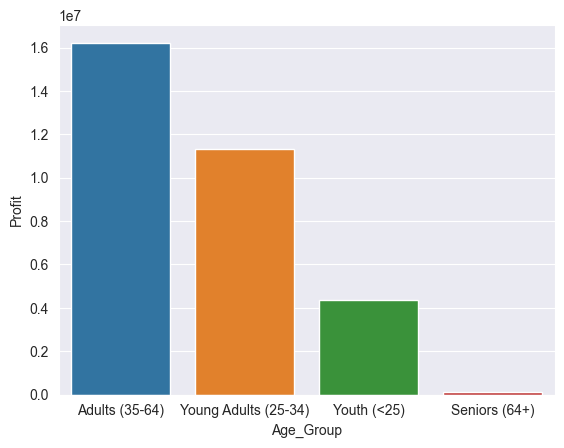

In [20]:
sns.barplot(data=age_profit, x="Age_Group", y="Profit")

#### Revenue by Gender

In [23]:
gen_rev = bike.groupby(["Customer_Gender"], as_index=False)["Revenue"].sum().sort_values(by="Revenue", ascending=False)
gen_rev

,Customer_Gender,Revenue
1,M,43132083
0,F,41694689


<Axes: xlabel='Customer_Gender', ylabel='Revenue'>

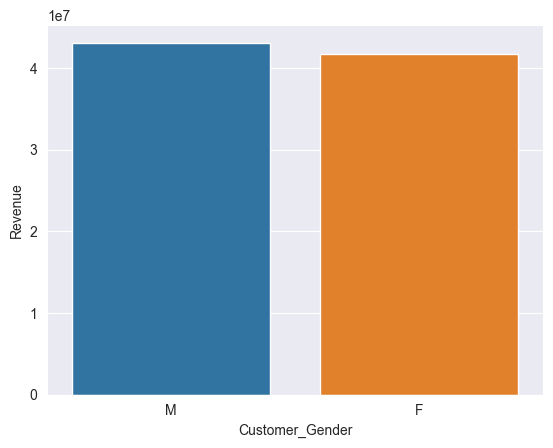

In [24]:
sns.barplot(data=gen_rev, x="Customer_Gender", y="Revenue")

### Products bought by Gender

<Axes: xlabel='Product_Category', ylabel='count'>

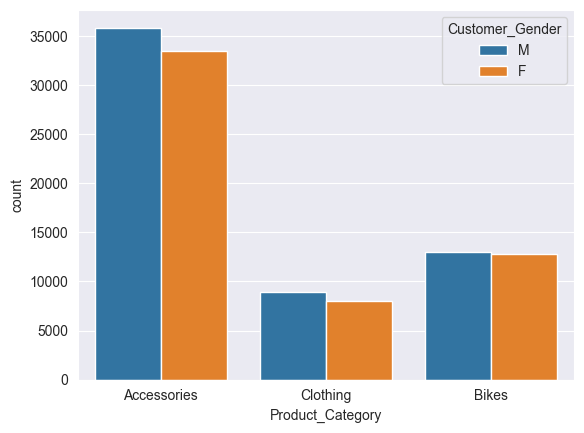

In [26]:
prod_gen = sns.countplot(data=bike, x="Product_Category", hue= "Customer_Gender")
prod_gen

<Axes: xlabel='Customer_Gender', ylabel='count'>

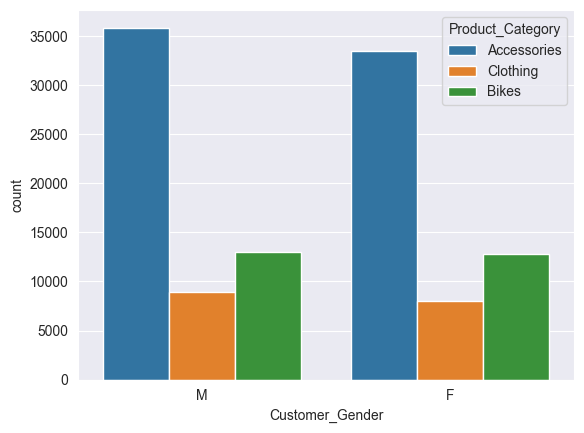

In [27]:
prod_gen2 = sns.countplot(data=bike, hue="Product_Category", x= "Customer_Gender")
prod_gen2

In [29]:
state_quan = bike.groupby(["State"], as_index=False)["Order_Quantity"].sum().sort_values(by="Order_Quantity", ascending=False).head(10)
state_quan

,State,Order_Quantity
6,California,267614
5,British Columbia,189499
8,England,155769
50,Washington,136894
26,New South Wales,114898
33,Oregon,66551
48,Victoria,65668
35,Queensland,57014
36,Saarland,30856
29,Nordrhein-Westfalen,29744


<Axes: xlabel='State', ylabel='Order_Quantity'>

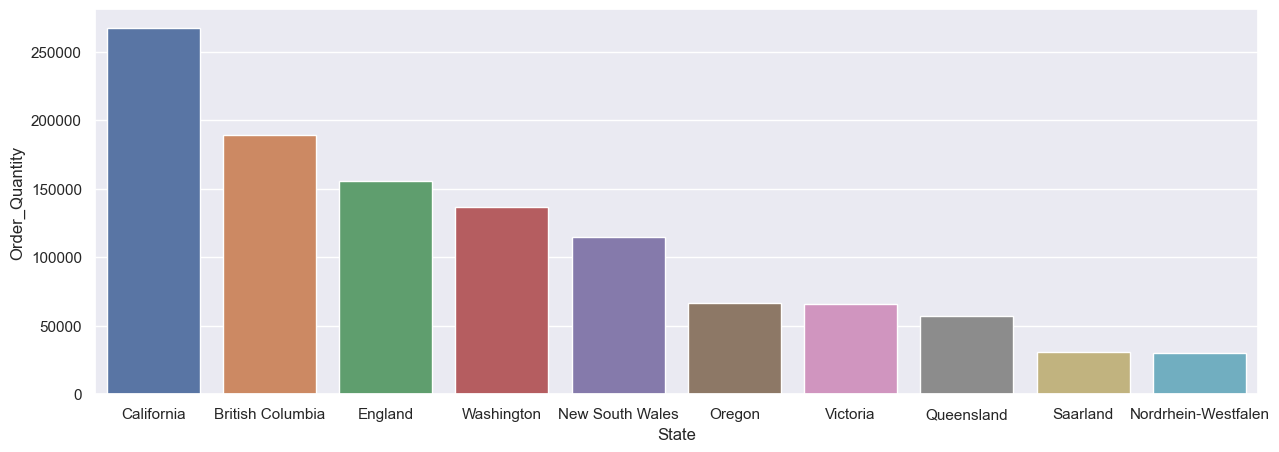

In [31]:
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(data=state_quan, x="State", y="Order_Quantity")

#### Product by Profit

In [34]:
prod_prof_top = bike.groupby(["Product"], as_index=False)["Profit"].sum().sort_values(by="Profit", ascending=False).head(5)
prod_prof_top

,Product,Profit
32,"Mountain-200 Black, 38",1302237
61,"Road-150 Red, 62",1237388
36,"Mountain-200 Silver, 42",1226878
101,"Sport-100 Helmet, Red",1191175
35,"Mountain-200 Silver, 38",1155311


In [35]:
prod_prof_bottom = bike.groupby(["Product"], as_index=False)["Profit"].sum().sort_values(by="Profit", ascending=True).head(5)
prod_prof_bottom

,Product,Profit
46,"Mountain-500 Black, 52",7487
87,"Road-650 Red, 52",9345
50,"Mountain-500 Silver, 48",9778
117,"Touring-3000 Blue, 50",13424
125,"Touring-3000 Yellow, 62",18371


##### Thank You